In [1]:
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import Box

import matplotlib.pyplot as plt
import numpy as np
import math

from IPython.display import HTML
from IPython.display import IFrame

import builtins

In [2]:
file = builtins.open("Bilder/Logo.png", "rb")
image = file.read()
bild_Logo = widgets.Image(
    value=image,
    format='png',
    width=200,
   #height=128,
    )
bild_Logo

A Jupyter Widget

# <span style="font-family:Century Gothic;color:DarkCyan">Arbeitspaket 11</span>

## <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 1</span>

Gegeben sei ein Individuum, das Nutzen aus Freizeit $f$ und Konsum $x$ zieht (Preis $p = 1$). Die
Nutzenfunktion sei mit $u = u(f, x)$ gegeben. Das Individuum bietet einen prozentualen
Anteil $l$ seines Zeitbudgets zum Lohnsatz $w = 1$ auf dem Arbeitsmarkt an.

> **Welcher Ausdruck beschreibt das Zeitbudget des Individuums?**

In [3]:
opinion_MR = widgets.RadioButtons(
    options=['F=100','l+f=1','l=f'],
    value=None,
    #description='Faktoren',
    disabled=False
)

button_MR = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_MR):
  if opinion_MR.value == 'l+f=1':
    button_MR.button_style = 'success'
    button_MR.description = 'Richtig'
  else:
    button_MR.button_style = 'danger'
    button_MR.description = 'Leider Falsch'

# set function as on_click on button
button_MR.on_click(check)

display(opinion_MR)
display(button_MR)

A Jupyter Widget

A Jupyter Widget

Der Staat beschließt die Einführung eines <a href="https://www.bpb.de/themen/medien-journalismus/netzdebatte/222285/debatte-bedingungsloses-grundeinkommen/">bedingungslosen Grundeinkommens $G$</a>. Zusätzlich zu ihrem Arbeitseinkommen erhalten alle Individuen ab sofort ein exogen gegebenes Nicht-Arbeitseinkommen $G$.

> **Skizzieren Sie in untenstehender Abbildung die Budgetgerade des Individuums für ein Grundeinkommen in Höhe von $G=0,25$ und $G=0,50$. Überprüfen Sie Ihr Ergebnis mit dem Slider.**

In [4]:
%matplotlib inline

def f(G):
    plt.figure(2)
    x = np.linspace(0, 1)
    plt.plot(x,(1+G)-1*x,color="Darkcyan", alpha=0.5, linewidth=2.0)
    plt.vlines(1, 0, G,color="Darkcyan", alpha=0.5, linewidth=2.0)
    plt.ylim(0, 2)
    plt.xlim(0, 1.1)
    plt.xlabel("Freizeit $f$")
    plt.margins(x=0)
    plt.ylabel("Konsum $x$")    
    plt.show()

    
interactive_plot = interactive(f, G=widgets.FloatSlider(min=0,max=1,step=0.01,value=0))
output = interactive_plot.children[-1]
interactive_plot

A Jupyter Widget

> **Stellen Sie das Optimierungsproblem des Individuums sowie die dazugehörige Lagrange-Funktion auf.**

In [5]:
accordion1 = widgets.Accordion([
    widgets.Label(
        value="$$ wl + G = px $$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="$$ max \\, u(f,x) \\quad u.d.NB.\\quad  wl + G = px $$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="$$ \mathcal{L} = u(f,x) + \lambda(w(1-f) + G - px) $$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    )], selected_index=None)
accordion1.set_title(0, 'Budgetbeschränkung')
accordion1.set_title(1, 'Optimierungsproblem')
accordion1.set_title(2, 'Lagrange-Funktion')

accordion1

A Jupyter Widget

> **Bestimmen Sie die Optimalitätsbedingungen und interpretieren Sie diese.**

In [6]:
accordion2 = widgets.Accordion([
    widgets.Label(
        value="BEO 1: $$\\frac{\partial \mathcal{L}}{\partial f}=\\frac{\partial u}{\partial f}-\lambda w\\overset{!}{=}0$$ BEO 2: $$\\frac{\partial\mathcal{L}}{\partial x}= \\frac{\partial u}{\partial x}-\lambda p\overset{!}{=}0$$ BEO 3: $$\\frac{\partial \mathcal {L}}{\partial \lambda}=w(1-f)+G-px\overset{!}{=}0$$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="$$ \\text{(1)}=\\text{(2)}:~ \\frac{\partial u}{\partial f}\cdot\\frac{1}{w}=\\frac{\partial u}{\partial x}\cdot\\frac{1}{p} $$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="$$\\frac{\\frac{\partial u}{\partial f}}{\\frac{\partial u}{\partial x}}=\\frac{w}{p}$$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="|GRS|  = relatives Preisverhältnis für Konsum und Freizeit bzw. (|Steigung Indifferenzkurve|)=(|Steigung Budgetrestriktion|)",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    )], selected_index=None)
    
accordion2.set_title(0, 'Bedingungen Erster Ordnung')
accordion2.set_title(1, 'Gleichsetzen')
accordion2.set_title(2, 'Optimalitätsbedingung')
accordion2.set_title(3, 'Interpretation')

accordion2

A Jupyter Widget

## <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 2: Anrechnung Arbeitseinkommen </span>

Die Regierung beschließt die Einführung des sogenannten Bürgergelds. Dieses Konzept sieht vor, dass Individuen ohne Arbeitseinkommen die Transferzahlung $G=60$ erhalten. Wird ein Individuum am Arbeitsmarkt aktiv, soll sein Arbeitseinkommen auf die Transferzahlung angerechnet werden. Die beiden aktiven Regierungsparteien sind sich uneinig, in welchem Ausmaß diese Anrechnung erfolgen soll. 

- **<span style="color:DarkCyan">Partei A</span>**  möchte, dass das Arbeitseinkommen voll angerechnet wird.
- **<span style="color:Maroon">Partei B</span>** möchte, dass das Arbeitseinkommen nur zu 80% angerechnet wird.

> **Skizzieren Sie den Verlauf der Budgetgeraden für die Vorschläge der <span style="color:DarkCyan">Partei A</span> und <span style="color:Maroon">Partei B</span>. Überprüfen Sie Ihr Ergebnis im Anschluss mit Hilfe der Slider <span style="color:DarkCyan">A</span> und <span style="color:Maroon">B</span>.** Gehen Sie davon aus, dass das maximale Zeitbudget 100 Stunden pro Woche beträgt. Für jede Arbeitsstunde erhält das Individuum einen Studenlohn von $w=1$. Eine Einheit Konsum kostet $p=1$.


In [7]:
%matplotlib inline

def f(A,B):
    plt.figure(2)
    x = np.linspace(1, 100, num=100)
    # Funktionen ohne Steuern
    plt.plot(x,100-x,color="#464646", linestyle='dotted')
    # Funktion mit voller Anrechnung    
    x1 = [0,40,100]
    y1 = [100,60,60]
    plt.plot(A*x1,A*y1,color="Darkcyan", linewidth=2.0)
    plt.vlines(100, 0,A*60,color="Darkcyan", linewidth=2.0)
    # Funktion mit 80 Anrechnung
    x2 = [0,25,100]
    y2 = [100,75,60]
    plt.plot(B*x2,B*y2,color="Maroon", linewidth=2.0)
    plt.vlines(100, 0,B*60,color="Maroon", linewidth=2.0)
    
    # Settings
    plt.ylim(0, 100)
    plt.xlim(0, 110)
    plt.xlabel("Freizeit $f$")
    plt.margins(x=0)
    plt.ylabel("Konsum $x$")    
    plt.show()
    
    
interactive_plot = interactive(f, A=(0, 1,1), B=(0, 1,1))
output = interactive_plot.children[-1]
interactive_plot

A Jupyter Widget

## <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 3

<a href="https://www.sciencedirect.com/science/article/pii/S0304407607001182">Lemieux und Milligan (2008)</a>  untersuchen die Auswirkung eines Sozialhilfeprogramms auf das Arbeitsangebot von Individuen in Quebec (Kanada).

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 3.1</span>
> **Auf welche Gruppe alleinstehender Männer mit einem Alter zwischen 25 und 39 Jahren konzentrieren sich die Autoren?**

In [8]:
opinion_MR = widgets.RadioButtons(
    options=['Mit High-School Abschluss und mit Kindern','Ohne High-School Abschluss und mit Kindern','Ohne High-School Abschluss, ohne Kindern'],
    value=None,
    #description='Faktoren',
    disabled=False
)

button_MR = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_MR):
  if opinion_MR.value == 'Ohne High-School Abschluss, ohne Kindern':
    button_MR.button_style = 'success'
    button_MR.description = 'Richtig'
  else:
    button_MR.button_style = 'danger'
    button_MR.description = 'Leider Falsch'

# set function as on_click on button
button_MR.on_click(check)

display(opinion_MR)
display(button_MR)

A Jupyter Widget

A Jupyter Widget

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 3.2</span>
Zeichnen Sie die Höhe der zu erwartenden Sozialhilfe (siehe Folie 324) für diese Gruppe in untenstehendes Diagramm ein.

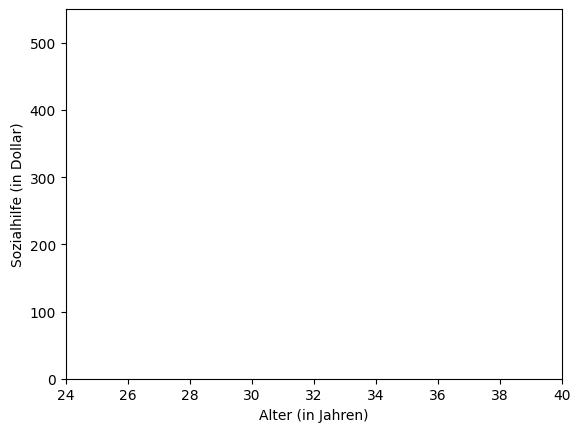

In [9]:
%matplotlib inline

#def f(A,B):
plt.figure(2)
x = np.linspace(1, 100, num=100)
# Benefits unter 30   
#x1 = [24,30]
#y1 = [185,185]
#plt.plot(x1,y1,color="Darkcyan", linewidth=2.0)
#plt.vlines(30,185,507, color="#464646", linestyle='dotted', linewidth=2.0)
# Benefits über 30 
#x2 = [30,40]
#y2 = [507,507]
#plt.plot(x2,y2,color="Darkcyan", linewidth=2.0)

    
# Settings
plt.ylim(0, 550)
plt.xlim(24, 40)
plt.xlabel("Alter (in Jahren)")
plt.margins(x=0)
plt.ylabel("Sozialhilfe (in Dollar)")    
plt.show()


### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 2.3</span>
>**Wieso vergleichen Lemieux und Milligan innerhalb dieser Gruppe nicht alle Personen unter 30 Jahren mit allen Personen über 30 Jahren?**

*Diese Aufgabe wird in der Präsenzveranstaltung besprochen.*

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 3.4</span>
Betrachten Sie nun folgende Abbildung aus Lemieux und Milligan (S. 816).

In [19]:
file = builtins.open("Bilder/Lemieux2008_Abbildung_3_S816.PNG", "rb")
image = file.read()
bild_Lemieux2008_1 = widgets.Image(
    value=image,
    format='png',
    width=700,
   #height=128,
    )
bild_Lemieux2008_1

A Jupyter Widget

>**Wie groß ist der Effekt der erhöhten Sozialhilfe auf die Beschäftigtenrate?**

In [11]:
opinion_MR = widgets.RadioButtons(
    options=['ca. -5 Prozent','ca. -5 Prozentpunkte','ca. +5Prozent','ca. +5 Prozentpunkte'],
    value=None,
    #description='Faktoren',
    disabled=False
)

button_MR = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_MR):
  if opinion_MR.value == 'ca. -5 Prozentpunkte':
    button_MR.button_style = 'success'
    button_MR.description = 'Richtig'
  else:
    button_MR.button_style = 'danger'
    button_MR.description = 'Leider Falsch'

# set function as on_click on button
button_MR.on_click(check)

display(opinion_MR)
display(button_MR)

A Jupyter Widget

A Jupyter Widget

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 3.5</span>
>**Lassen sich die Schlussfolgerungen aus der Studie auf alle Männer im Alter zwischen 30 und 31 Jahren übertragen? Bitte begründen Sie Ihre Antwort.**

In [12]:
opinion_MR = widgets.RadioButtons(
    options=['Ja','Nein'],
    value=None,
    #description='Faktoren',
    disabled=False
)

button_MR = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_MR):
  if opinion_MR.value == 'Nein':
    button_MR.button_style = 'success'
    button_MR.description = 'Richtig'
  else:
    button_MR.button_style = 'danger'
    button_MR.description = 'Leider Falsch'

# set function as on_click on button
button_MR.on_click(check)

display(opinion_MR)
display(button_MR)

A Jupyter Widget

A Jupyter Widget

## <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 4</span>
### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 4.1</span>
Beim Rent-Seeking beeinflusst eine (Wähler-)Gruppe die Politik so, dass sie auf Kosten der Gesamtgesellschaft Vorteile erhält. Schauen Sie das folgende <a href="https://www.youtube.com/watch?v=95pyLE_ZsDg&t=58s">Video</a>, das dieses Prinzip näher erläutert.

In [13]:
display(IFrame('https://www.youtube.com/embed/95pyLE_ZsDg', '600px', '300px'))

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 3.2</span>
Beim Rent-Seeking konkurrieren Unternehmen um eine vorteilhafte Behandlung durch den Staat. Ein Beispiel dafür könnte die Gewährung einer Monopolstellung sein. In Deutschland erhielt die Deutsche Post AG beispielsweise bis zum Jahr 2007 solch eine bevorzugte Position: Das Unternehmen erhielt durch das im Postgesetz verankerte <a href="https://www.handelsblatt.com/unternehmen/handel-konsumgueter/ende-des-briefmonopols-wenn-der-postmann-dreimal-klingelt/2780878.html">Briefmonopol</a> eine Exklusivlizenz für den Transport von Briefsendungen bis 50 Gramm. Das folgende Schaubild zeigt diese Monopolsituation im Preis-Mengen Diagramm.

In [14]:
file = builtins.open("Bilder/Abbildung_Monopol.jpg", "rb")
image = file.read()
bild_Mono = widgets.Image(
    value=image,
    format='png',
    width=600,
   #height=128,
    )
bild_Mono

A Jupyter Widget

Die BW-Post würde ebenfalls gerne die Rente dieser Monopolstellung abschöpfen. Sie konkurriert daher mit der Deutschen Post AG um die vorteilhafte Behandlung durch den Staat.

> **Welche Fläche des Diagramms stellt die Rente dar, die durch Rent-Seeking abgeschöpft werden kann?**

In [15]:
opinion_rent = widgets.RadioButtons(
    options=['Fläche A','Fläche B','Fläche C'],
    value=None,
    disabled=False
)

button_rent = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_rent):
  if opinion_rent.value == 'Fläche B':
    button_rent.button_style = 'success'
    button_rent.description = 'Richtig'
  else:
    button_rent.button_style = 'danger'
    button_rent.description = 'Leider Falsch'

# set function as on_click on button
button_rent.on_click(check)

display(opinion_rent)
display(button_rent)

A Jupyter Widget

A Jupyter Widget

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 4.3</span>

Es gibt drei Kategorien, wie Rent-Seeking soziale Kosten verursachen kann:
    
1. Arbeitsaufwand und Ausgaben der um die staatlichen Vorteile konkurrierenden Unternehmen.
2. Arbeitsaufwand der Beschäftigten im öffentlichen Dienst, die auf die Bemühungen der Unternehmen reagieren.
3. Verzerrungen im Verhalten Dritter durch Rent-Seeking Aktivitäten der Unternehmen oder der staatlichen Reaktion auf diese.

> **Ordnen Sie die untenstehenden Beispiele einer der drei Kategorien zu.**

*Sowohl die Deutsche Post AG als auch die BW-POST stellen Lobbyisten ein, die bei der Regierung um den Zuschlag für das Postmonopol werben.*

In [16]:
opinion_1 = widgets.Dropdown(
    options=[('',0), ('Eins', 1), ('Zwei', 2), ('Drei', 3)],
    value=0,
    description='Kategorie:',
)

button_1 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)
# define function
def check(button_1):
  if opinion_1.value == 1:
    button_1.button_style = 'success'
    button_1.description = 'Richtig'
  else:
    button_1.button_style = 'danger'
    button_1.description = 'Leider Falsch'

# set function as on_click on button
button_1.on_click(check)


items = [opinion_1, button_1]
box_1 = Box(children=items)
display(box_1) # <- this one command displays all children

A Jupyter Widget

*Der für den Zuschlag des Monopols zuständige Beamte erhält Zuwendungen der Unternehmen. Andere Beamt:innen investieren Arbeitsaufwand darin, alles über Briefzustellung zu lernen um eines Tages diese Position zu erhalten.*

In [17]:
opinion_2 = widgets.Dropdown(
    options=[('',0), ('Eins', 1), ('Zwei', 2), ('Drei', 3)],
    value=0,
    description='Kategorie:',
)

button_2 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)
# define function
def check(button_2):
  if opinion_2.value == 2:
    button_2.button_style = 'success'
    button_2.description = 'Richtig'
  else:
    button_2.button_style = 'danger'
    button_2.description = 'Leider Falsch'

# set function as on_click on button
button_2.on_click(check)


items = [opinion_2, button_2]
box_2 = Box(children=items)
display(box_2) # <- this one command displays all children

A Jupyter Widget

*Paketzusteller sehen, dass der Staat durch das Briefmonopol Vorteile gewährt. Sie verwenden Ressourcen darauf, den Staat zur Einführung eines Paketmonopols zu bewegen.*

In [18]:
opinion_3 = widgets.Dropdown(
    options=[('',0), ('Eins', 1), ('Zwei', 2), ('Drei', 3)],
    value=0,
    description='Kategorie:',
)

button_3 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)
# define function
def check(button_3):
  if opinion_3.value == 3:
    button_3.button_style = 'success'
    button_3.description = 'Richtig'
  else:
    button_3.button_style = 'danger'
    button_3.description = 'Leider Falsch'

# set function as on_click on button
button_3.on_click(check)


items = [opinion_3, button_3]
box_3 = Box(children=items)
display(box_3) # <- this one command displays all children

A Jupyter Widget

## <span style="font-family:Century Gothic;color:DarkCyan">Literatur</span>

Lemieux und Milligan (2008), Incentive effects of social assistance: A regression discontinuity approach, Journal of Econometrics 142, S.807–828